### scikit-learn biblioteka

**scikit-learn** je Python bibloteka koja se specijalno koristi za zadatke mašinskog ucenja. **linear_model** je modul koji omogućava metode za rad sa linearnim modelima kao sto su linearna regresija, linearna regresija sa regularizacijama, logistička regresija, ... **model_selection** je modul koji raspolaže funkcionalnostima poput podele skupa podataka na skupove za treniranje i testiranje, unakrsne validacije, generisanja stratifikovanih skupova, ... **metrics** modul stavlja na raspolaganje različite metrike koje se mogu koristiti u evaluaciji. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

Nadalje ce biti posmatran problem linearne regresije sa modelom $f(x) = \beta_0 + \beta_1x$. 
<br>
Skup podataka sa kojim ćemo raditi će biti sintetički. Vrednosti atributa će biti podeoci ekvidistantne mreže na intervalu [1, 5], a vrednosti ciljne funkcije ce biti generisane po formuli $y = 10x + 2sin(x)$ uz dodatak šuma. 

In [2]:
# velicina skupa podataka
N = 100

In [3]:
# vrednosti ulaza
x = np.linspace(1, 5, N).reshape(N, 1)

In [4]:
# vrednosti ciljne funkcije
y = 11*np.sin(x) + 1.5* np.random.randn(N, 1)

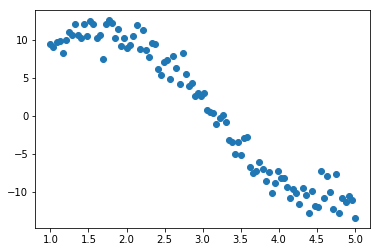

In [5]:
plt.plot(x, y, 'o')
plt.show()

In [6]:
# funkcija kojom je odredjen linearni model
def f(b0, b1, x):
    return b0+b1*x

In [8]:
model = linear_model.LinearRegression()

In [9]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size = 0.6, test_size = 0.4, random_state = 7)

In [10]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
b1 = model.coef_[0][0]
b1

-7.105452835643065

In [12]:
b0 = model.intercept_[0]
b0

21.703630243381973

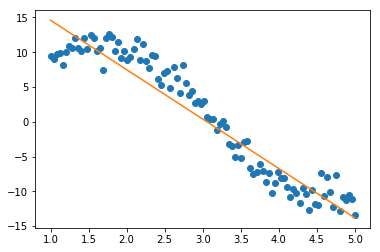

In [13]:
plt.plot(x, y, 'o')
plt.plot(x, f(b0, b1, x))
plt.show()

In [14]:
model.predict(23)

array([[-141.72178498]])

Evaluacija modela: 

In [15]:
y_predicted = model.predict(x_test)

In [16]:
mse = metrics.mean_squared_error(y_test, y_predicted)
mse

7.8088803892642344

In [17]:
r2 = metrics.r2_score(y_test, y_predicted)
r2

0.8933672701559836

Grafik reziduala modela služi za proveru pretpostavke o konstantnoj varijansi regresionog modela. Očekuje se da vrednosti koje su predviđene budu uređene po svojoj vrednosti duž *x* ose.

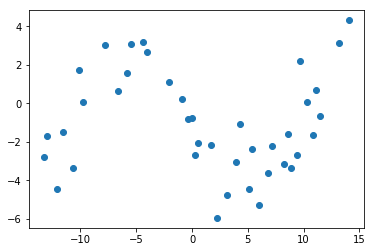

In [18]:
plt.plot(y_predicted, y_predicted-y_test, 'o')